# Getting Started with pandas

In [1]:
import numpy as np

In [2]:
import pandas as pd
#from icecream import ic

## Introduction to Pandas Data Structures

### Series
A Series is a one-dimensional array-like object containing a sequence of values (of
similar types to NumPy types) and an associated array of data labels, called its index.
The simplest Series is formed from only an array of data:

In [6]:
import pandas as pd, numpy as np
PyMarks=pd.Series([16,15,12,20],index=['Asavari','Rashmi','Manoj','Chetan'])
PyMarks['Manoj']

12

In [10]:
PyMarks['Rashmi']

15

In [5]:
PyMarks.index=['a','b','c','d']
PyMarks

a    16
b    15
c    12
d    20
dtype: int64

In [13]:
PyMarks

Asavari    16
Rashmi     15
Manoj      12
Chetan     20
dtype: int64

In [14]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [18]:
obj2['d':'a']

d    4
b    7
a   -5
dtype: int64

In [16]:
obj2[1:3]

b    7
a   -5
dtype: int64

Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will __preserve the index-value__ link:

In [20]:
PyMarks[PyMarks <= 16]

Asavari    16
Rashmi     15
Manoj      12
dtype: int64

In [21]:
np.log(PyMarks)

Asavari    2.772589
Rashmi     2.708050
Manoj      2.484907
Chetan     2.995732
dtype: float64

In [22]:
Int1=pd.Series([10,20,30],index=["c","a","b"])
Int2=pd.Series([20,30,40],index=["a","b","d"])

In [23]:
Int=Int1+Int2
Int

a    40.0
b    60.0
c     NaN
d     NaN
dtype: float64

In [24]:
Int12=Int.isnull().sum()
Int12

2


Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values.

In [29]:
16 in PyMarks

False

### Creating Series from Dictionary

In [30]:
sdata = {'Ohio': 35000, 
         'Texas': 71000, 
         'Oregon': 16000, 
         'Utah': 5000,
        'India': np.nan}
obj3 = pd.Series(sdata)
obj3

Ohio      35000.0
Texas     71000.0
Oregon    16000.0
Utah       5000.0
India         NaN
dtype: float64

In [31]:
obj3.index

Index(['Ohio', 'Texas', 'Oregon', 'Utah', 'India'], dtype='object')

In [32]:
obj3.values

array([35000., 71000., 16000.,  5000.,    nan])

In [31]:
sindex=['Oregon', 'Utah','India','Ohio', 'Texas','Pakistan']   #Index Sequence Changed, Observe the mssing value
obj4=pd.Series(sdata,index=sindex)
obj4

Oregon      16000.0
Utah         5000.0
India           NaN
Ohio        35000.0
Texas       71000.0
Pakistan        NaN
dtype: float64

### Creating Series from Lists

In [35]:
obj5=pd.Series([12,14,16],index=["a","b","c"])
obj5

a    12
b    14
c    16
dtype: int64

In [36]:
obj6=pd.Series({"a":23,"b":34,"c":45,"d":34})
obj6

a    23
b    34
c    45
d    34
dtype: int64

In [37]:
obj5+obj6

a    35.0
b    48.0
c    61.0
d     NaN
dtype: float64

In [38]:
obj6-obj5

a    11.0
b    20.0
c    29.0
d     NaN
dtype: float64

## DataFrame
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of
as a dict of Series all sharing the same index. 

In [39]:
# Constructing Data Frame using Dictionary

data = {'State': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'Year': [2000, 2001, 2002, 2001, 2002, 2003],
        'Pop': [1.5, 1.7, np.nan, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data,index=[1,2,3,4,5,6])
frame.tail(3)

,State,Year,Pop
4,Nevada,2001,2.4
5,Nevada,2002,2.9
6,Nevada,2003,3.2


In [40]:
# head method selects only the first two rows:
print(frame.head(2))

frame.tail(3)

  State  Year  Pop
1  Ohio  2000  1.5
2  Ohio  2001  1.7


,State,Year,Pop
4,Nevada,2001,2.4
5,Nevada,2002,2.9
6,Nevada,2003,3.2


In [45]:
# Rearrangement of Columns
pd.DataFrame(data, columns=['State', 'Pop','Year'])

,State,Pop,Year
0,Ohio,1.5,2000
1,Ohio,1.7,2001
2,Ohio,NaN,2002
3,Nevada,2.4,2001
4,Nevada,2.9,2002
5,Nevada,3.2,2003


In [42]:
# If you pass a column that isn’t contained in the dict, it will appear with missing values in the result:
frame4=pd.DataFrame(data, columns=['Year', 'State', 'Pop','Extra'])
frame4

,Year,State,Pop,Extra
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,NaN,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [44]:
frame4["Extra"]=pd.Series([1,2,3,4,5,6,420],index=[2,3,1,0,4,5,6])
frame4["Extra2"]=frame4["Extra"]+frame4["Pop"]
frame4

,Year,State,Pop,Extra,Extra2
0,2000,Ohio,1.5,4,5.5
1,2001,Ohio,1.7,3,4.7
2,2002,Ohio,NaN,1,NaN
3,2001,Nevada,2.4,2,4.4
4,2002,Nevada,2.9,5,7.9
5,2003,Nevada,3.2,6,9.2


In [66]:
frame4.columns

Index(['Year', 'State', 'Pop', 'Extra', 'Extra2'], dtype='object')

In [45]:
frame4.index=["a","b","c","d","e","f"]
frame4.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [46]:
# index assignment
frame2=pd.DataFrame(data, columns=['Year', 'State', 'Pop'],index=["a","b","c","d","e","f"])
frame2

,Year,State,Pop
a,2000,Ohio,1.5
b,2001,Ohio,1.7
c,2002,Ohio,NaN
d,2001,Nevada,2.4
e,2002,Nevada,2.9
f,2003,Nevada,3.2


In [52]:
frame2['State'][2]
frame2.Pop[3]
frame2.iloc[:,1]

a      Ohio
b      Ohio
c      Ohio
d    Nevada
e    Nevada
f    Nevada
Name: State, dtype: object

In [53]:
# Accessing Particular Column
frame2['State']

a      Ohio
b      Ohio
c      Ohio
d    Nevada
e    Nevada
f    Nevada
Name: State, dtype: object

In [54]:
frame2

,Year,State,Pop
a,2000,Ohio,1.5
b,2001,Ohio,1.7
c,2002,Ohio,NaN
d,2001,Nevada,2.4
e,2002,Nevada,2.9
f,2003,Nevada,3.2


In [94]:
# Accessing Particular Column using dot operator
frame2['State']

a      Ohio
b      Ohio
c      Ohio
d    Nevada
e    Nevada
f    Nevada
Name: State, dtype: object

In [53]:
np.unique(frame2['State'])

array(['Nevada', 'Ohio'], dtype=object)

In [55]:
frame3=pd.DataFrame(data, columns=['Year', 'State', 'Pop',"Extra"])
frame3["Extra"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: Extra, dtype: object

In [57]:
# When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame. 
frame3["Extra"]=np.random.randn(6)
frame3

,Year,State,Pop,Extra
0,2000,Ohio,1.5,1.362775
1,2001,Ohio,1.7,-1.095938
2,2002,Ohio,NaN,-0.160546
3,2001,Nevada,2.4,-1.285867
4,2002,Nevada,2.9,-0.121849
5,2003,Nevada,3.2,-0.524495


In [58]:
# If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes:
val = pd.Series([-1.2, -1.5, -1.7], index=[0,2,4])
frame3["Extra"]=val
frame3

,Year,State,Pop,Extra
0,2000,Ohio,1.5,-1.2
1,2001,Ohio,1.7,NaN
2,2002,Ohio,NaN,-1.5
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,-1.7
5,2003,Nevada,3.2,NaN


In [59]:
del frame3['Extra']
frame3

,Year,State,Pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,NaN
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [60]:
# nested dict of dicts
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame4=pd.DataFrame(pop)

# Outer dict keys as the columns and the inner keys as the row indices

frame4

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [105]:
# transpose the DataFrame
frame4.T# frame4.transpose()

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [102]:
frame4

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [69]:
frame4.index=[2001, 2002, 2003]
frame4

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,1.5


## Reindexing
An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index.

In [106]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [8]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[1, 3, 5])
obj3

1      blue
3    purple
5    yellow
dtype: object

In [9]:
obj3.reindex([0,1,2,3,4,5], method='bfill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [14]:
import numpy as np
obj4=pd.Series([21,15,16,48,46,np.nan])
obj4[obj4.isnull()]=np.mean(obj4)
obj4

0    21.0
1    15.0
2    16.0
3    48.0
4    46.0
5    29.2
dtype: float64

In [15]:
data2=np.arange(9).reshape((3, 3))+1
data2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [28]:
frame = pd.DataFrame(data2,
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,1,2,3
c,4,5,6
d,7,8,9


In [33]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2.iloc[1,]=frame2.mean()
frame2

,Ohio,Texas,California
a,1.0,2.0,3.0
b,4.0,5.0,6.0
c,4.0,5.0,6.0
d,7.0,8.0,9.0


In [35]:
data=np.arange(16).reshape(4,4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [39]:
frame6=pd.DataFrame(data,index=data[:,2])
frame6

,0,1,2,3
2,0,1,2,3
6,4,5,6,7
10,8,9,10,11
14,12,13,14,15


In [5]:
import pandas as pd, numpy as np
df=pd.read_csv('Data/Iris.csv',index_col='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [7]:
#df.plot()

<AxesSubplot:title={'center':'Scatter Plot of Sepal Length Vs Petal Length'}, xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

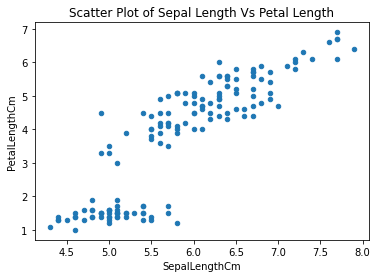

In [12]:
df.plot(kind='scatter',x='SepalLengthCm',y='PetalLengthCm',title="Scatter Plot of Sepal Length Vs Petal Length")

<AxesSubplot:>

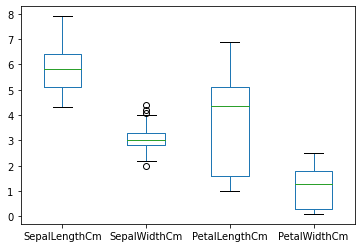

In [13]:
df.plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

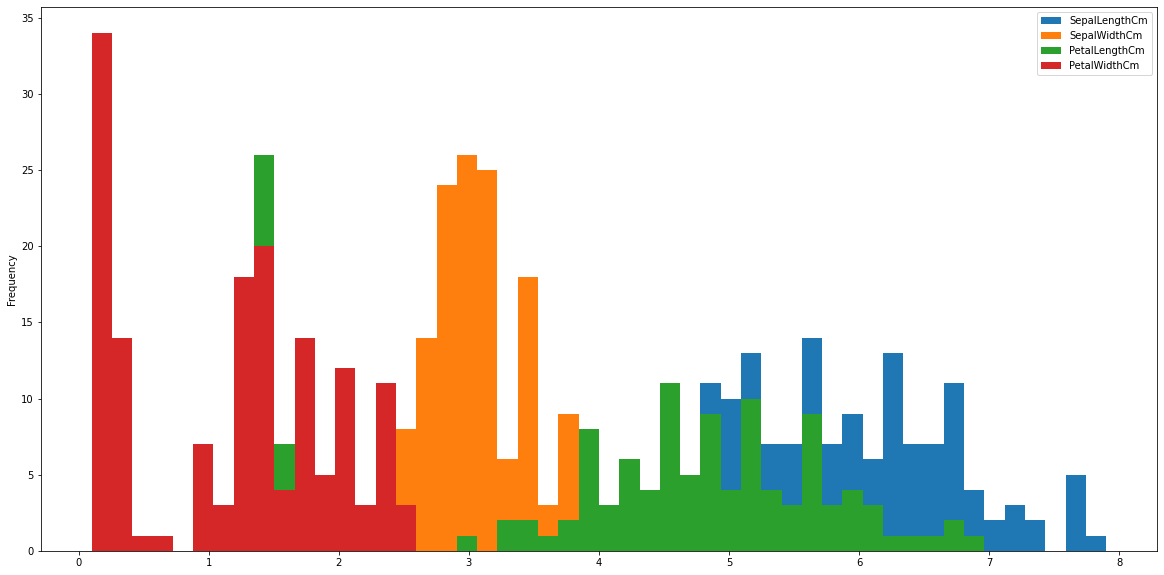

In [36]:
df.plot(kind='hist',bins=50,by='Species',figsize=(20,10))

<AxesSubplot:ylabel='Density'>

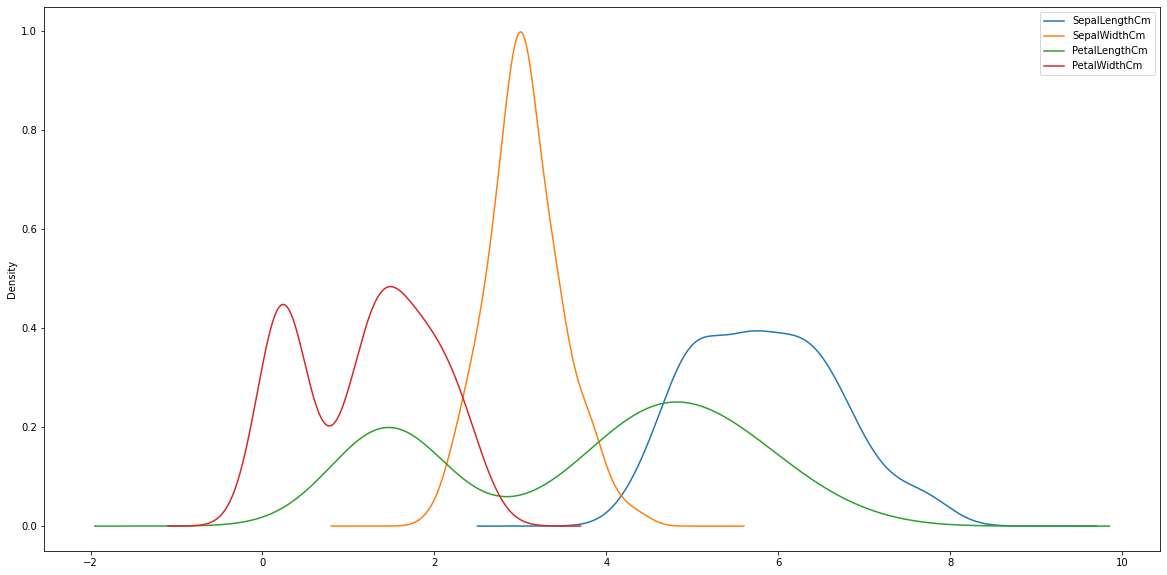

In [31]:
df.plot(kind='kde',figsize=(20,10))